# Sectors EDA #
*by Rosana de Oliveira Gomes*

In this notebook, we investigate the text extracted by websites associated to Climate Change Mitation by applying NLP and data analysis techniques. 

The data used in this project comes from the [ImpactLab](https://impactlab.org) and [DrawDown](https://drawdown.org/sectors/) websites.

In this analysis, you will learn about:

* keyword extraction 
* data Cleaning and preprocessing with NLP
* assigning categories to text based on a description
* text data visualization 


In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

## Loading Data ##

Getting data from the scraping of the websites.


In [2]:
df_dd_sectors = pd.read_csv('datasets/dd_sectors.csv')
df_dd_tableofsolutions = pd.read_csv('datasets/dd_tableofsolutions_table.csv')
df_dd_solutions = pd.read_csv('datasets/dd_solutions_data.csv')
df_il_articles = pd.read_csv('datasets/il_articles.csv')
df_il_article_content = pd.read_csv('datasets/il_article_content.csv')

print(f"shape dd_sectors: {df_dd_sectors.shape}", 
      df_dd_sectors.columns)
df_dd_sectors.head(10)



shape dd_sectors: (9, 7) Index(['Unnamed: 0', 'sector', 'url', 'st_value', 'st_unit', 'st_label',
       'content'],
      dtype='object')


,Unnamed: 0,sector,url,st_value,st_unit,st_label,content
0,0,Electricity,https://drawdown.org/sectors/electricity,200.6–440.2,Gigatons,CO2 EquivalentReduced / Sequestered(2020–2050),\nElectricity is particles in motion—a flow of...
1,1,"Food, Agriculture, and Land Use",https://drawdown.org/sectors/food-agriculture-...,204.2–273.9,Gigatons,CO2 EquivalentReduced / Sequestered(2020–2050),\nHuman activity has transformed a significant...
2,2,Industry,https://drawdown.org/sectors/industry,128.8–143.8,Gigatons,CO2 EquivalentReduced / Sequestered(2020–2050),"\nFrom concrete to computers, cars to clothing..."
3,3,Transportation,https://drawdown.org/sectors/transportation,58–97.4,Gigatons,CO2 EquivalentReduced / Sequestered(2020–2050),\nGetting people or things from point A to poi...
4,4,Buildings,https://drawdown.org/sectors/buildings,73.7–141.2,Gigatons,CO2 EquivalentReduced / Sequestered(2020–2050),\nInside is where most people are most of the ...
5,5,Land Sinks,https://drawdown.org/sectors/land-sinks,243.1–387.8,Gigatons,CO2 EquivalentReduced / Sequestered(2020–2050),\nLand is a critical component of the climate ...
6,6,Coastal and Ocean Sinks,https://drawdown.org/sectors/coastal-and-ocean...,1.07–1.48,Gigatons,CO2 EquivalentReduced / Sequestered(2020–2050),\nOurs is a water world. Though Earth has a la...
7,7,Engineered Sinks,https://drawdown.org/sectors/engineered-sinks,2.22–4.39,Gigatons,CO2 EquivalentReduced / Sequestered(2020–2050),\nCan human engineering play a supporting role...
8,8,Health and Education,https://drawdown.org/sectors/health-and-education,85.42,Gigatons,CO2 EquivalentReduced / Sequestered(2020–2050),\nClimate and social systems are profoundly co...


In [3]:
print(f"shape dd_tableofsolutions: {df_dd_tableofsolutions.shape}")
df_dd_tableofsolutions.columns
df_dd_tableofsolutions.head(10)

shape dd_tableofsolutions: (82, 4)


,Solution,Sector(s),Scenario 1 *,Scenario 2 *
0,Smart Thermostats,Electricity / Buildings,6.99,7.40
1,Building Automation Systems,Electricity / Buildings,6.47,10.48
2,LED Lighting,Electricity,16.07,17.53
3,Insulation,Electricity / Buildings,16.97,19.01
4,Dynamic Glass,Electricity / Buildings,0.29,0.47
5,High-Performance Glass,Electricity / Buildings,10.04,12.63
6,Green and Cool Roofs,Electricity / Buildings,0.60,1.10
7,District Heating,Electricity / Buildings,6.28,9.85
8,High-Efficiency Heat Pumps,Electricity / Buildings,4.16,9.29
9,Solar Hot Water,Electricity / Buildings,3.59,14.29


In [4]:
print(f"shape dd_solutions: {df_dd_solutions.shape}", df_dd_solutions.columns)
df_dd_solutions.head(10)


shape dd_solutions: (82, 23) Index(['Unnamed: 0', 'title', 'node1', 'area', 'node2', 'url', 'st_value1',
       'st_unit1', 'st_label1', 'st_value2', 'st_unit2', 'st_label2',
       'st_value3', 'st_unit3', 'st_label3', 'st_value4', 'st_unit4',
       'st_label4', 'short_def', 'summary', 'impact', 'tech_link',
       'tech_summary'],
      dtype='object')


,Unnamed: 0,title,node1,area,node2,url,st_value1,st_unit1,st_label1,st_value2,...,st_unit3,st_label3,st_value4,st_unit4,st_label4,short_def,summary,impact,tech_link,tech_summary
0,0,Abandoned Farmland Restoration,Land Sinks,Support Sinks,Use Degraded Land,https://drawdown.org/solutions/abandoned-farml...,12.48–20.32,Gigatons,CO2 EquivalentReduced / Sequestered(2020–2050),$98.16–159.91,...,Trillion $US,Lifetime NetOperational Savings,$2.66–4.34,Trillion $US,LifetimeNet Profit,"Degraded farmland is often abandoned, but need...","Solution Summary*Around the world, farmers are...","Impact: Currently, 0.4 billion hectares of far...",https://drawdown.org/solutions/abandoned-farml...,Project Drawdown describes abandoned farmland ...
1,1,Alternative Cement,Industry,Reduce Sources,Improve Materials,https://drawdown.org/solutions/alternative-cement,7.98–16.1,Gigatons,CO2 EquivalentReduced / Sequestered(2020–2050),$-63.46,...,0,0,0,0,0,NaN,Solution Summary*Cement is a vital source of s...,NaN,https://drawdown.org/solutions/alternative-cem...,Project Drawdown defines alternative cement as...
2,2,Alternative Refrigerants,Industry,Reduce Sources,Address Refrigerants,https://drawdown.org/solutions/alternative-ref...,43.53–50.53,Gigatons,CO2 EquivalentReduced / Sequestered(2020–2050),0,...,0,0,0,0,0,Fluorinated gases are not the only refrigerant...,Solution SummaryThis is a new solution; a summ...,Impact: Pursuant to the Kigali Accord signed i...,https://drawdown.org/solutions/alternative-ref...,Project Drawdown defines alternative refrigera...
3,3,Bamboo Production,Land Sinks,Support Sinks,Use Degraded Land,https://drawdown.org/solutions/bamboo-production,8.27–21.31,Gigatons,CO2 EquivalentReduced / Sequestered(2020–2050),$52.25–161.94,...,Trillion $US,Lifetime NetOperational Savings,$1.71–4.35,Trillion $US,LifetimeNet Profit,Bamboo rapidly sequesters carbon in biomass an...,Solution Summary*In the Philippine creation st...,Impact: Bamboo is planted on 33.52million hect...,https://drawdown.org/solutions/bamboo-producti...,Project Drawdown defines bamboo production as ...
4,4,Bicycle Infrastructure,Transportation,Reduce Sources,Shift to Alternatives,https://drawdown.org/solutions/bicycle-infrast...,2.56–6.65,Gigatons,CO2 EquivalentReduced / Sequestered(2020–2050),$-7.54–-2.66,...,Trillion $US,Lifetime NetOperational Savings,0,0,0,Bicycles offer an alternative to cars and foss...,Solution Summary*Bicycles are on the rise as c...,"Impact: In 2018, just under 3 percent of urban...",https://drawdown.org/solutions/bicycle-infrast...,Project Drawdown defines bicycle infrastructur...
5,5,Biochar Production,Engineered Sinks,Support Sinks,Remove and Store Carbon,https://drawdown.org/solutions/biochar-production,2.22–4.39,Gigatons,CO2 EquivalentReduced / Sequestered(2020–2050),$195.87–383.3,...,Trillion $US,Lifetime NetOperational Savings,0,0,0,Biomass slowly baked in the absence of oxygen ...,"Solution Summary*In ancient Amazonia, the wast...",Impact: Biochar can produce 2.2–4.4 gigatons o...,https://drawdown.org/solutions/biochar-product...,Project Drawdown defines biochar as a bioseque...
6,6,Biogas for Cooking,Buildings,Reduce Sources,Shift Energy Sources,https://drawdown.org/solutions/biogas-for-cooking,4.65–9.7,Gigatons,CO2 EquivalentReduced / Sequestered(2020–2050),$24.72–51.59,...,Billion $US,Lifetime NetOperational Savings,0,0,0,Anaerobic digesters process backyard or farmya...,Solution SummaryThis is a new solution; a summ...,Impact: Small biogas reactors can be installed...,https://drawdown.org/solutions/biogas-for-cook...,Project Drawdown defines biogas for cooking as...
7,7,Biomass Power,Electricity,Reduce Sources,Shift Production,https://drawdown.org/solutions/biomass-power,2.52–3.57,Gigatons,CO2 EquivalentReduced / Sequestered(2020–2050),$51.12–62.37,...,Billion $US,Lifetime NetOperational Savings,0,0,0,Biomass feedstock can replace fossil fuels for...,Solution Summary*Biomass energy is a “bridge” ...,Impact: This analysis assumes all bio

In [5]:
print(f"shape df_il_articles: {df_il_articles.shape}", df_il_articles.columns)
df_il_articles.head(10)


shape df_il_articles: (54, 8) Index(['Unnamed: 0', 'category', 'url', 'citation', 'link', 'sumary', 'type',
       'pub_date'],
      dtype='object')


,Unnamed: 0,category,url,citation,link,sumary,type,pub_date
0,0,climateScience,https://impactlab.org/research-area/climate-sc...,"Dawei Li, Jiacan Yuan, and Robert (Bob) Kopp. ...",https://impactlab.org/research/escalating-glob...,NaN,Journal Article,"Published March 7, 2020"
1,1,climateScience,https://impactlab.org/research-area/climate-sc...,"Kopp, R. E., DeConto, R. M., Bader, D. A., Hay...",https://impactlab.org/research/evolving-unders...,This study links a framework for global and lo...,Journal Article,"Published December 13, 2017"
2,2,climateScience,https://impactlab.org/research-area/climate-sc...,"USGCRP, 2017: Climate Science Special Report: ...",https://impactlab.org/research/climate-science...,Lab co-director Robert Kopp helped write the “...,Journal Article,"Published November 3, 2017"
3,3,climateScience,https://impactlab.org/research-area/climate-sc...,U.S. Government Accountability Office\n,https://impactlab.org/research/climate-change-...,The GAO's new report draws heavily from two na...,Report,"Published October 24, 2017"
4,4,climateScience,https://impactlab.org/research-area/climate-sc...,"Yuan, J., Stein, M. L., & Kopp, R. E. (2020). ...",https://impactlab.org/research/the-evolving-di...,The impacts of heat waves in a warming climate...,Journal Article,"Published September 9, 2020"
5,5,socialCost,https://impactlab.org/research-area/social-cost/,"Carleton, Tamma and Greenstone, Michael, Updat...",https://impactlab.org/research/updating-the-un...,This paper outlines a two-step process to retu...,Working Paper,"Published January 14, 2021"
6,6,socialCost,https://impactlab.org/research-area/social-cost/,"Ciscar, J.-C., Rising, J., Kopp, R. E., & Feye...",https://impactlab.org/research/assessing-futur...,NaN,Journal Article,"Published July 26, 2019"
7,7,socialCost,https://impactlab.org/research-area/social-cost/,"Duffy, P. B., Field, C.B., Diffenbaugh, N. S.,...",https://impactlab.org/research/0-review-streng...,We assess scientific evidence that has emerged...,Journal Article,"Published December 14, 2018"
8,8,socialCost,https://impactlab.org/research-area/social-cost/,"R. Revesz, M. Greenstone, M. Hanemann, M. Live...",https://impactlab.org/research/best-cost-estim...,Prominent economists and lawyers highlight the...,Journal Article,"Published August 18, 2017"
9,9,socialCost,https://impactlab.org/research-area/social-cost/,Presentation by Michael Greenstone and the Cli...,https://impactlab.org/research/assessing-appro...,Michael Greenstone describes pathbreaking new ...,Report,"Published May 5, 2017"


In [6]:
print(f"shape df_il_article_content: {df_il_article_content.shape}", df_il_article_content.columns)
df_il_article_content.head(10)


shape df_il_article_content: (54, 10) Index(['Unnamed: 0', 'abstract', 'articleType', 'article_links', 'citation',
       'content', 'download_link', 'header', 'pub_date', 'url'],
      dtype='object')


,Unnamed: 0,abstract,articleType,article_links,citation,content,download_link,header,pub_date,url
0,0,"Heat stress harms human health, agriculture, a...",Journal Article,['https://iopscience.iop.org/article/10.1088/1...,"\nDawei Li, Jiacan Yuan, and Robert (Bob) Kopp...",NaN,https://impactlab.org/wp-content/uploads/2017/...,Escalating Global Exposure to Compound Heat-Hu...,"Published March 7, 2020",https://impactlab.org/research/escalating-glob...
1,1,Mechanisms such as ice-shelf hydrofracturing a...,Journal Article,['http://onlinelibrary.wiley.com/doi/10.1002/2...,"\nKopp, R. E., DeConto, R. M., Bader, D. A., H...",NaN,https://impactlab.org/wp-content/uploads/2017/...,Evolving Understanding of Antarctic Ice-Sheet ...,"Published December 13, 2017",https://impactlab.org/research/evolving-unders...
2,2,"This assessment concludes, based on extensive ...",Journal Article,['https://science2017.globalchange.gov/'],"\nUSGCRP, 2017: Climate Science Special Report...",NaN,https://impactlab.org/wp-content/uploads/2017/...,Climate Science Special Report: Fourth Nationa...,"Published November 3, 2017",https://impactlab.org/research/climate-science...
3,3,NaN,Report,[],\nU.S. Government Accountability Office\n,NaN,http://www.gao.gov/assets/690/687466.pdf,Climate Change: Information on Potential Econo...,"Published October 24, 2017",https://impactlab.org/research/climate-change-...
4,4,The impacts of heat waves in a warming climate...,Journal Article,"['https://doi.org/10.1029/2019JD032100', 'http...","\nYuan, J., Stein, M. L., & Kopp, R. E. (2020)...",NaN,http://www.gao.gov/assets/690/687466.pdf,The Evolving Distribution of Relative Humidity...,"Published September 9, 2020",https://impactlab.org/research/the-evolving-di...
5,5,This paper outlines a two-step process to retu...,Working Paper,"['https://ssrn.com/abstract=3764255', 'https:/...","\nCarleton, Tamma and Greenstone, Michael, Upd...","\n\n\nThe social cost of carbon (SCC), the tot...",https://impactlab.org/wp-content/uploads/2021/...,Updating the United States Government’s Socia...,"Published January 14, 2021",https://impactlab.org/research/updating-the-un...
6,6,Climate change will impact many economic secto...,Journal Article,['https://iopscience.iop.org/article/10.1088/1...,"\nCiscar, J.-C., Rising, J., Kopp, R. E., & Fe...",NaN,https://impactlab.org/wp-content/uploads/2021/...,Assessing future climate change impacts in the...,"Published July 26, 2019",https://impactlab.org/research/assessing-futur...
7,7,We assess scientific evidence that has emerged...,Journal Article,['http://science.sciencemag.org/content/early/...,"\nDuffy, P. B., Field, C.B., Diffenbaugh, N. S...",NaN,https://impactlab.org/wp-content/uploads/2021/...,Strengthened scientific support for the Endang...,"Published December 14, 2018",https://impactlab.org/research/0-review-streng...
8,8,Despite the Trump administration’s decision to...,Journal Article,['http://science.sciencemag.org/content/357/63...,"\nR. Revesz, M. Greenstone, M. Hanemann, M. Li...",NaN,https://impactlab.org/wp-content/uploads/2021/...,Best cost estimate of greenhouse gases,"Published August 18, 2017",https://impactlab.org/research/best-cost-estim...
9,9,Michael Greenstone describes pathbreaking new ...,Report,['http://sites.nationalacademies.org/DBASSE/BE...,\nPresentation by Michael Greenstone and the C...,NaN,https://impactlab.org/wp-content/uploads/2021/...,Assessing Approaches to Updating the Social Co...,"Published May 5, 2017",https://impactlab.org/research/assessing-appro...


Clearning the datasets to contain only relevant columns:

In [7]:
df_dd_sectors = df_dd_sectors.drop(columns=['Unnamed: 0', 'url', 'st_value',  
                                            'st_unit',  'st_label'])

df_dd_solutions = df_dd_solutions.drop(columns=['Unnamed: 0', 'url', 'st_value1', 
                                                'st_unit1', 'st_value2', 'st_unit2', 
                                                'st_label2', 'st_value3', 'st_unit3', 
                                                'st_label3', 'st_value4', 'st_unit4', 
                                                'st_label4', 'tech_link'])

df_il_articles = df_il_articles.drop(columns=['Unnamed: 0', 'url', 'citation', 
                                              'link', 'type','pub_date'])

df_il_article_content = df_il_article_content.drop(columns=['Unnamed: 0', 'articleType',
                                                            'article_links', 'citation',
                                                            'download_link', 'pub_date', 
                                                            'url'])

print(df_dd_sectors)
print(df_dd_solutions)
print(df_il_articles)
print(df_il_article_content)

                            sector  \
0                      Electricity   
1  Food, Agriculture, and Land Use   
2                         Industry   
3                   Transportation   
4                        Buildings   
5                       Land Sinks   
6          Coastal and Ocean Sinks   
7                 Engineered Sinks   
8             Health and Education   

                                             content  
0  \nElectricity is particles in motion—a flow of...  
1  \nHuman activity has transformed a significant...  
2  \nFrom concrete to computers, cars to clothing...  
3  \nGetting people or things from point A to poi...  
4  \nInside is where most people are most of the ...  
5  \nLand is a critical component of the climate ...  
6  \nOurs is a water world. Though Earth has a la...  
7  \nCan human engineering play a supporting role...  
8  \nClimate and social systems are profoundly co...  
                                title           node1            area

53       migration  Investigates the effects of variations in temp...
                                             abstract  \
0   Heat stress harms human health, agriculture, a...   
1   Mechanisms such as ice-shelf hydrofracturing a...   
2   This assessment concludes, based on extensive ...   
3                                                 NaN   
4   The impacts of heat waves in a warming climate...   
5   This paper outlines a two-step process to retu...   
6   Climate change will impact many economic secto...   
7   We assess scientific evidence that has emerged...   
8   Despite the Trump administration’s decision to...   
9   Michael Greenstone describes pathbreaking new ...   
10  Growing evidence demonstrates that climatic co...   
11  Climate change threatens the economy of the Un...   
12  The social cost of carbon (SCC) is a crucial t...   
13  This paper develops the first globally compreh...   
14  Temperature and relative humidity have opposin...   
15                

## Text Cleaning ##

Steps for typical NLP preprocessing to be applied to the title and summary of service opportunities.

Let's start with importing relevant NLP libraries

In [8]:
import contractions
import string
import nltk
import regex as re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to /home/rosana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/rosana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rosana/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/rosana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Next, let's assingn new columns to a copy of the original dataframe, in order to store the preprocessed text of the `title` and `summary` columns.

**Step 1:** Contraction Mapping / Expanding Contractions

**Step 2:** Tokenization


**Step 3:** Lowercasing

**Step 4:** Spell Checking 

**Step 5:** Removing ‘Stop Words’ 


**Step 6:** Stemming/Lemmatization

In [9]:
# Preprocessing function

def text_preprocessing(text, spelling=False):
    '''
    NLP preprocessing steps in a given dataframe and returns a preprocessed dataframe
    1. Remove contractions
    2. Tokenization
    3. Lowercasing
    4. Remove punctuation
    5. Remove stopwords
    6. Replace misspelled words
    7. Lemmatization
    
    Arguments:
    `descriptions`: descriptions to be preprocessed
    '''
    
    # 
    
    # Make sure we have a column of a data frame as input
    text = pd.Index(text).fillna('')
    
    # 1. Removing contractions
    preprocessed = text.map(lambda x: [contractions.fix(word) for word in x.split()])
    preprocessed = preprocessed.map(lambda x: ' '.join(w for w in x))
    
    # 2. Tokenization
    preprocessed = preprocessed.map(word_tokenize)
    
    # 3. Set all words to lower case
    preprocessed = preprocessed.map(lambda x: [word.lower() for word in x])
    
    # 4. Remove punctuation
    punc = string.punctuation
    preprocessed = preprocessed.map(lambda x: [word for word in x if word not in punc])
    
    # 5. Remove stopwords
    stop_words = set(stopwords.words('english'))
    preprocessed = preprocessed.map(lambda x: [word for word in x if word not in stop_words])
    
    # 6. Replace misspelling
    if spelling:
        spell = SpellChecker()
        preprocessed = preprocessed.map(lambda x: [spell.correction(word) for word in x])
  
    # 7. Lemmatization
    
    preprocessed = preprocessed.map(nltk.tag.pos_tag)

    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN

    preprocessed = preprocessed.map(lambda x: [(word, get_wordnet_pos(pos_tag)) 
                                               for (word, pos_tag) in x])
    
    wnl = WordNetLemmatizer()
    preprocessed = preprocessed.map(lambda x: [wnl.lemmatize(word, tag) 
                                               for word, tag in x])
#    now = datetime.now()

#    print("Current Time =", now)
    return preprocessed

In [10]:
df_dd_sectors.head()


,sector,content
0,Electricity,\nElectricity is particles in motion—a flow of...
1,"Food, Agriculture, and Land Use",\nHuman activity has transformed a significant...
2,Industry,"\nFrom concrete to computers, cars to clothing..."
3,Transportation,\nGetting people or things from point A to poi...
4,Buildings,\nInside is where most people are most of the ...


In [11]:
df_dd_solutions.head()

,title,node1,area,node2,st_label1,short_def,summary,impact,tech_summary
0,Abandoned Farmland Restoration,Land Sinks,Support Sinks,Use Degraded Land,CO2 EquivalentReduced / Sequestered(2020–2050),"Degraded farmland is often abandoned, but need...","Solution Summary*Around the world, farmers are...","Impact: Currently, 0.4 billion hectares of far...",Project Drawdown describes abandoned farmland ...
1,Alternative Cement,Industry,Reduce Sources,Improve Materials,CO2 EquivalentReduced / Sequestered(2020–2050),NaN,Solution Summary*Cement is a vital source of s...,NaN,Project Drawdown defines alternative cement as...
2,Alternative Refrigerants,Industry,Reduce Sources,Address Refrigerants,CO2 EquivalentReduced / Sequestered(2020–2050),Fluorinated gases are not the only refrigerant...,Solution SummaryThis is a new solution; a summ...,Impact: Pursuant to the Kigali Accord signed i...,Project Drawdown defines alternative refrigera...
3,Bamboo Production,Land Sinks,Support Sinks,Use Degraded Land,CO2 EquivalentReduced / Sequestered(2020–2050),Bamboo rapidly sequesters carbon in biomass an...,Solution Summary*In the Philippine creation st...,Impact: Bamboo is planted on 33.52million hect...,Project Drawdown defines bamboo production as ...
4,Bicycle Infrastructure,Transportation,Reduce Sources,Shift to Alternatives,CO2 EquivalentReduced / Sequestered(2020–2050),Bicycles offer an alternative to cars and foss...,Solution Summary*Bicycles are on the rise as c...,"Impact: In 2018, just under 3 percent of urban...",Project Drawdown defines bicycle infrastructur...


In [12]:
df_il_articles.head()


,category,sumary
0,climateScience,NaN
1,climateScience,This study links a framework for global and lo...
2,climateScience,Lab co-director Robert Kopp helped write the “...
3,climateScience,The GAO's new report draws heavily from two na...
4,climateScience,The impacts of heat waves in a warming climate...


In [13]:
df_il_article_content.head()


,abstract,content,header
0,"Heat stress harms human health, agriculture, a...",NaN,Escalating Global Exposure to Compound Heat-Hu...
1,Mechanisms such as ice-shelf hydrofracturing a...,NaN,Evolving Understanding of Antarctic Ice-Sheet ...
2,"This assessment concludes, based on extensive ...",NaN,Climate Science Special Report: Fourth Nationa...
3,NaN,NaN,Climate Change: Information on Potential Econo...
4,The impacts of heat waves in a warming climate...,NaN,The Evolving Distribution of Relative Humidity...


In [14]:
# Testing function

test_df = pd.DataFrame()
test_df['content'] = df_dd_sectors['content']
%time test_df['preprocessed'] = text_preprocessing(test_df['content'])

CPU times: user 2.59 s, sys: 147 ms, total: 2.74 s
Wall time: 2.88 s


In [15]:
test_df.head(20)

,content,preprocessed
0,\nElectricity is particles in motion—a flow of...,"[electricity, particle, motion—a, flow, electr..."
1,\nHuman activity has transformed a significant...,"[human, activity, transform, significant, frac..."
2,"\nFrom concrete to computers, cars to clothing...","[concrete, computer, car, clothe, industry, se..."
3,\nGetting people or things from point A to poi...,"[get, people, thing, point, point, b, perhaps,..."
4,\nInside is where most people are most of the ...,"[inside, people, time, central, feature, human..."
5,\nLand is a critical component of the climate ...,"[land, critical, component, climate, system, a..."
6,\nOurs is a water world. Though Earth has a la...,"[water, world, though, earth, land-centric, na..."
7,\nCan human engineering play a supporting role...,"[human, engineering, play, support, role, natu..."
8,\nClimate and social systems are profoundly co...,"[climate, social, system, profoundly, connect,..."


## Exploratory Data Analysis (EDA) 

Verifying most common words or combinations of words (ngrams) per category, in order to check if the pre-determined keywords seem valid for the dataset.

In [16]:
import matplotlib.pyplot as plt
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

Let's review the columns in the dataset:

In [17]:
df_dd_sectors['preprocessed'] = test_df['preprocessed']

df_dd_sectors.head()

,sector,content,preprocessed
0,Electricity,\nElectricity is particles in motion—a flow of...,"[electricity, particle, motion—a, flow, electr..."
1,"Food, Agriculture, and Land Use",\nHuman activity has transformed a significant...,"[human, activity, transform, significant, frac..."
2,Industry,"\nFrom concrete to computers, cars to clothing...","[concrete, computer, car, clothe, industry, se..."
3,Transportation,\nGetting people or things from point A to poi...,"[get, people, thing, point, point, b, perhaps,..."
4,Buildings,\nInside is where most people are most of the ...,"[inside, people, time, central, feature, human..."


Now looking into the categories available:

In [18]:
set(df_dd_sectors['sector'])

{'Buildings',
 'Coastal and Ocean Sinks',
 'Electricity',
 'Engineered Sinks',
 'Food, Agriculture, and\xa0Land Use',
 'Health and Education',
 'Industry',
 'Land Sinks',
 'Transportation'}

In [19]:
category_count = df_dd_sectors['sector'].value_counts()

fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(data = df_dd_sectors,
               x= 'sector',
               palette = "Set3",
               orient = 'h').set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Counts per Sector', fontsize= 16)
ax.set_ylabel('Counts', fontsize=14);
ax.set_xlabel('Sector', fontsize=14);

We see that most services are related to `Strengthening Communities` and the minority is related to `Emergency Preparedness`.

Let's now look into the most common words associated to these community services.

In [20]:
#keywords 

def plot_top_keywords_barchart(text, title, n=1):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_keywords=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_keywords))
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.xlabel("Keywords Frequency")
    plt.ylabel("Top 20 Keywords mentioned in Content")
    sns.barplot(x=y,y=x)
    

In [21]:
df_dd_sectors["preprocessed_text"] = [' '.join(map(str, l)) for l in df_dd_sectors['preprocessed']]

plot_top_keywords_barchart(df_dd_sectors['preprocessed_text'], 'Drawdown Sectors',1)

We can now compare how the keywords diverge across categories:

In [22]:
plot_top_keywords_barchart(df_dd_sectors[df_dd_sectors['sector']=='Buildings']['preprocessed_text'], 'Buildings', 1)
plot_top_keywords_barchart(df_dd_sectors[df_dd_sectors['sector']=='Coastal and Ocean Sinks']['preprocessed_text'], 'Coastal and Ocean Sinks', 1)
plot_top_keywords_barchart(df_dd_sectors[df_dd_sectors['sector']=='Electricity']['preprocessed_text'], 'Electricity', 1)
plot_top_keywords_barchart(df_dd_sectors[df_dd_sectors['sector']=='Engineered Sinks']['preprocessed_text'], 'Engineered Sinks', 1)
plot_top_keywords_barchart(df_dd_sectors[df_dd_sectors['sector']== 'Food, Agriculture, and\xa0Land Use']['preprocessed_text'], 'Food, Agriculture, and\xa0Land Use',1)
plot_top_keywords_barchart(df_dd_sectors[df_dd_sectors['sector']=='Health and Education']['preprocessed_text'], 'Health and Education',1)
plot_top_keywords_barchart(df_dd_sectors[df_dd_sectors['sector']=='Industry']['preprocessed_text'], 'Industry',1)
plot_top_keywords_barchart(df_dd_sectors[df_dd_sectors['sector']=='Land Sinks']['preprocessed_text'], 'Land Sinks',1)
plot_top_keywords_barchart(df_dd_sectors[df_dd_sectors['sector']=='Transportation']['preprocessed_text'], 'Transportation',1)


We can summarize the most common words per category in wordcloud visualizations:

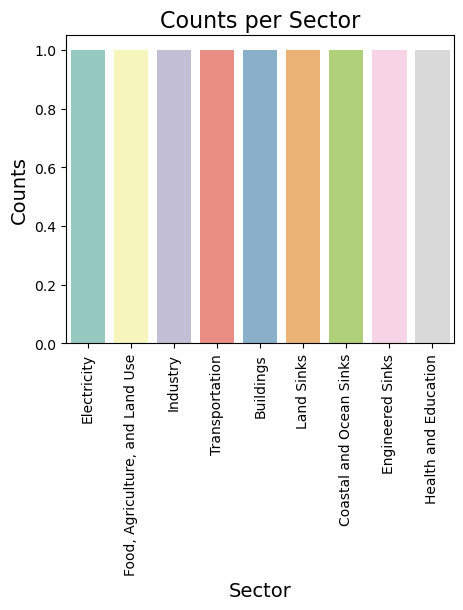

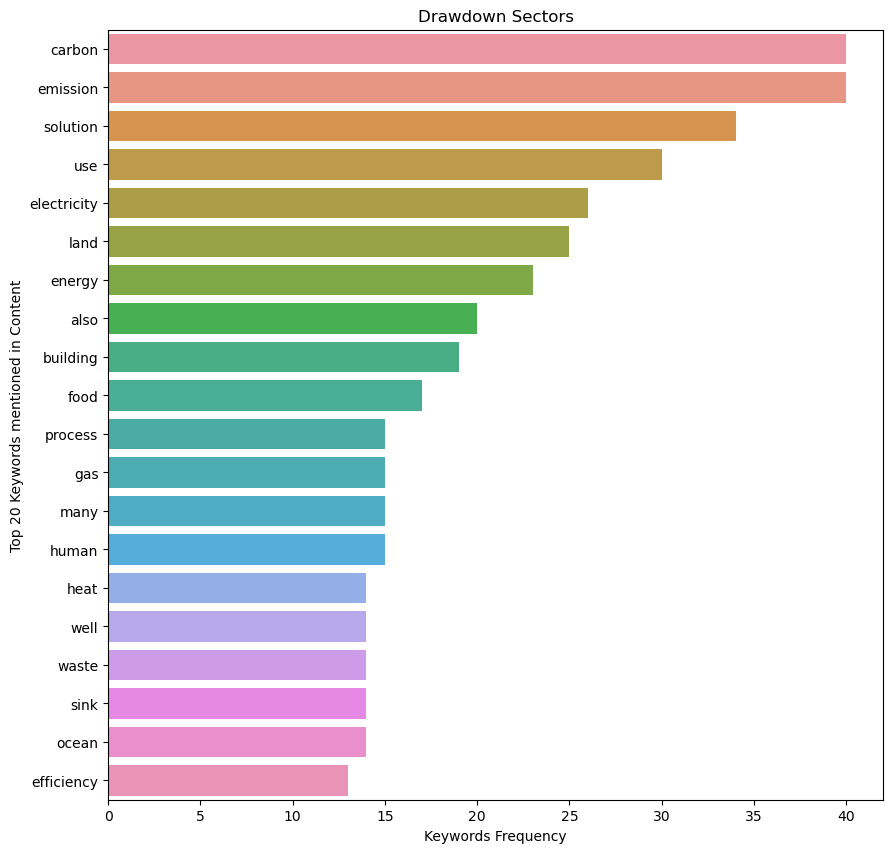

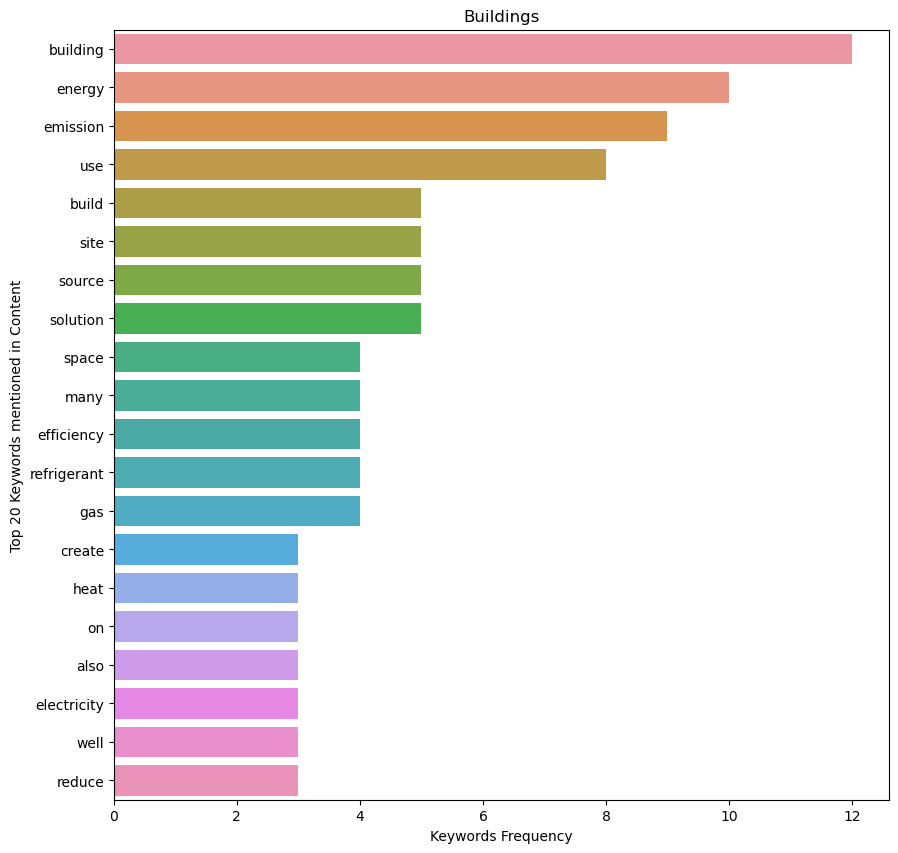

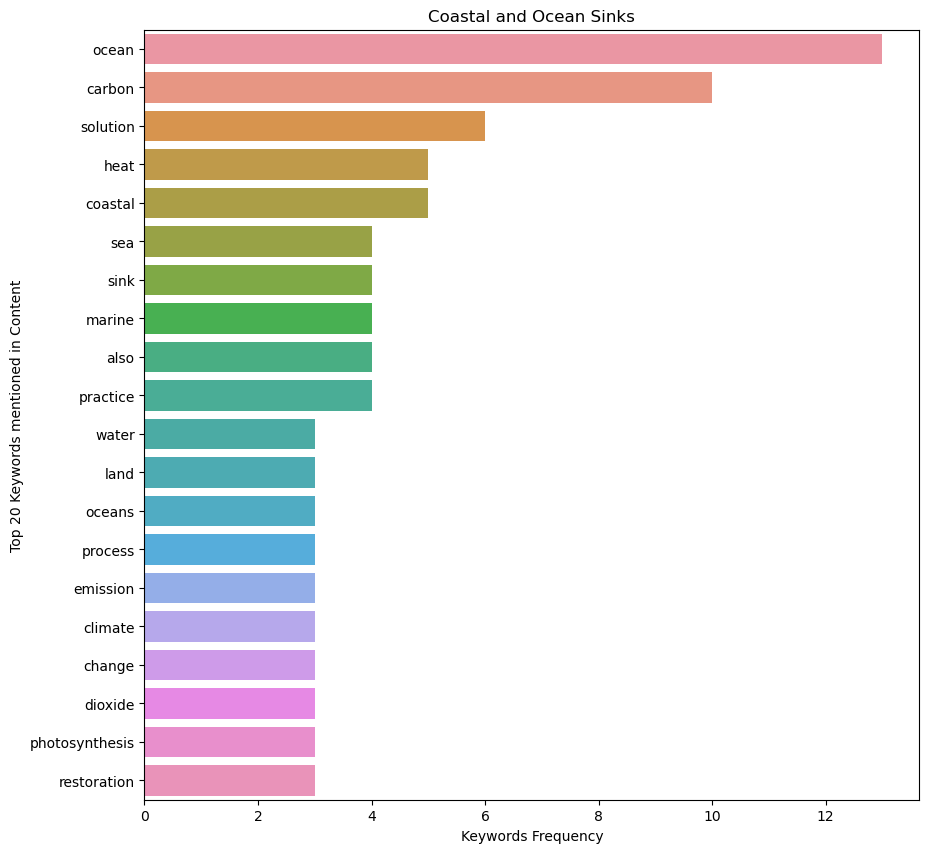

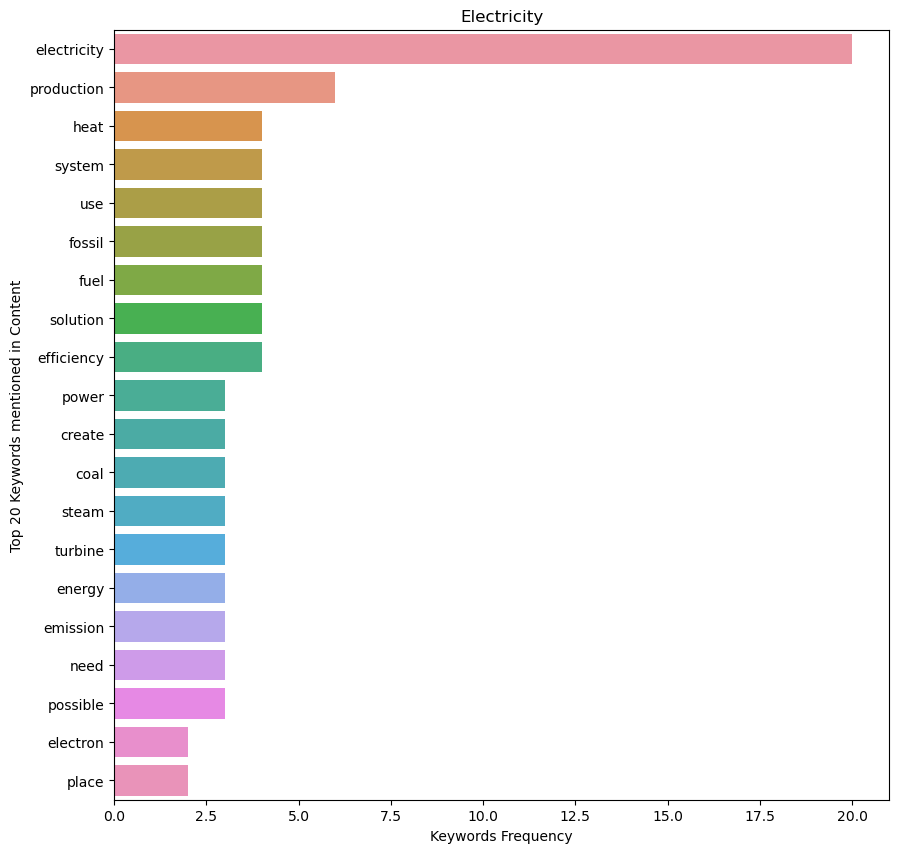

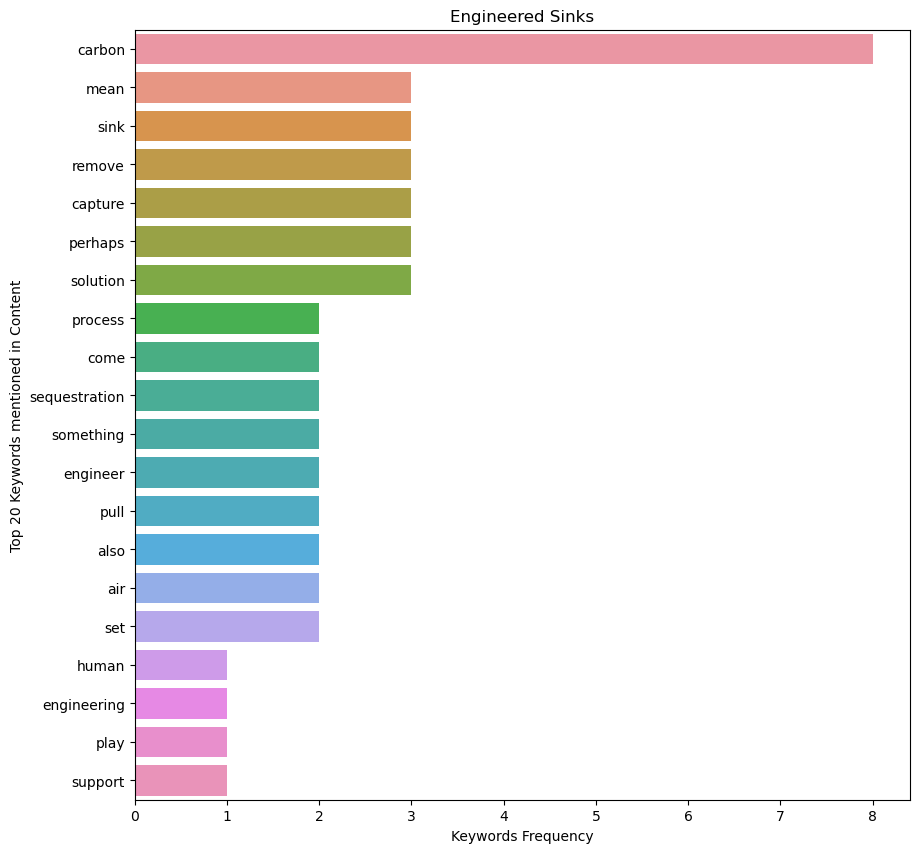

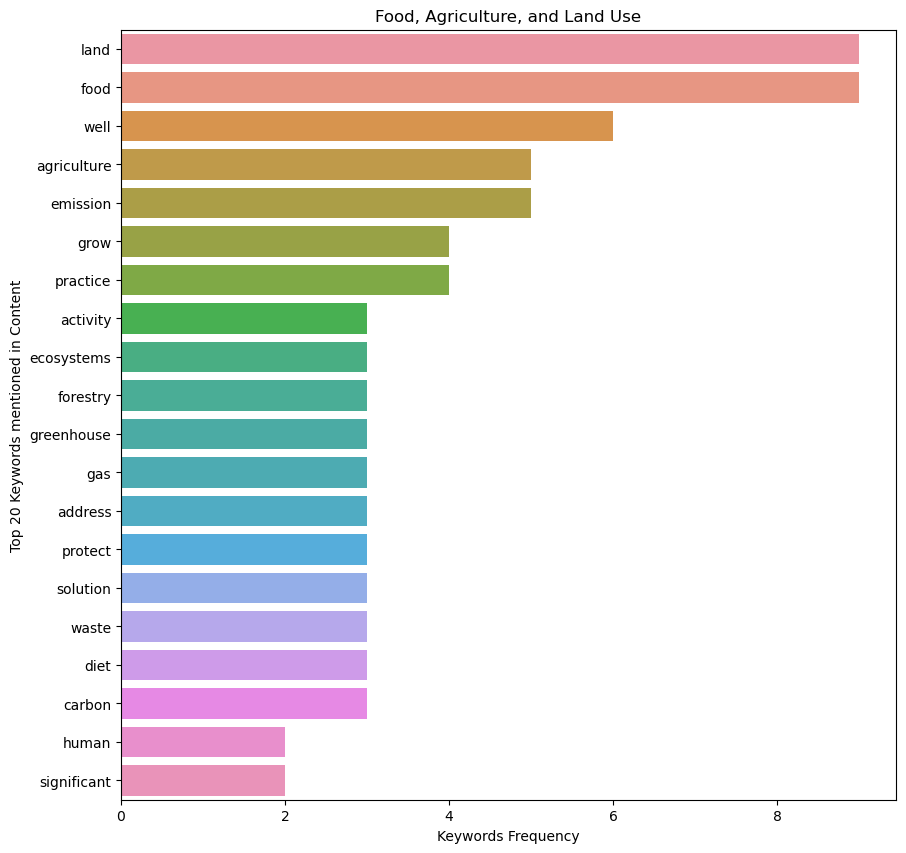

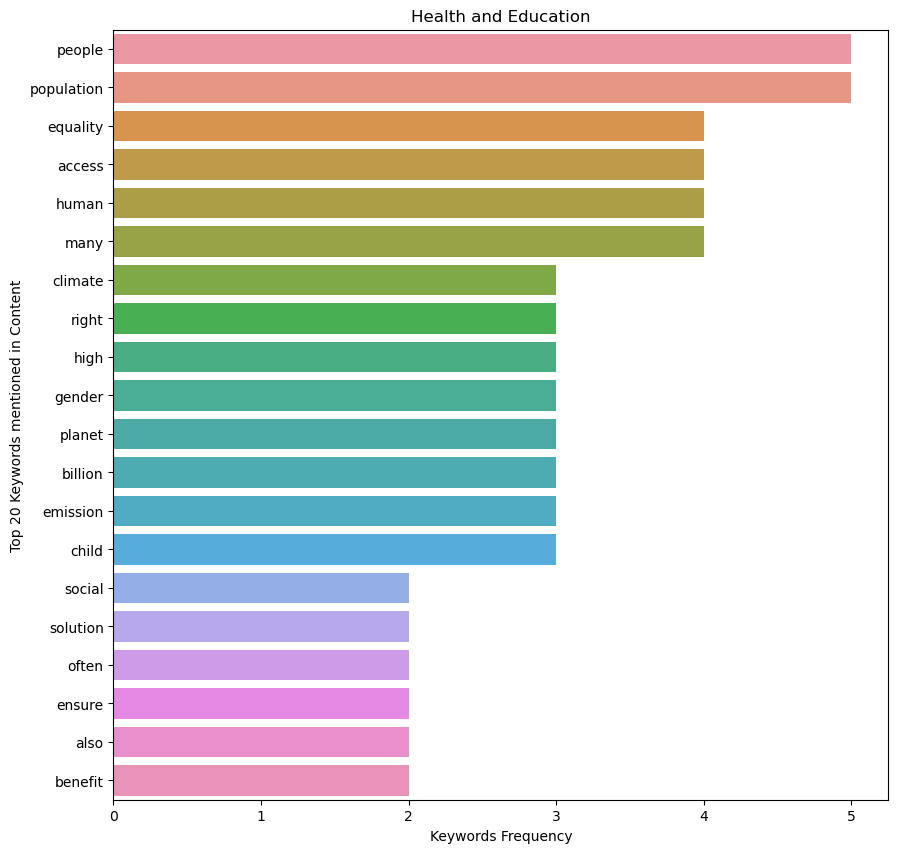

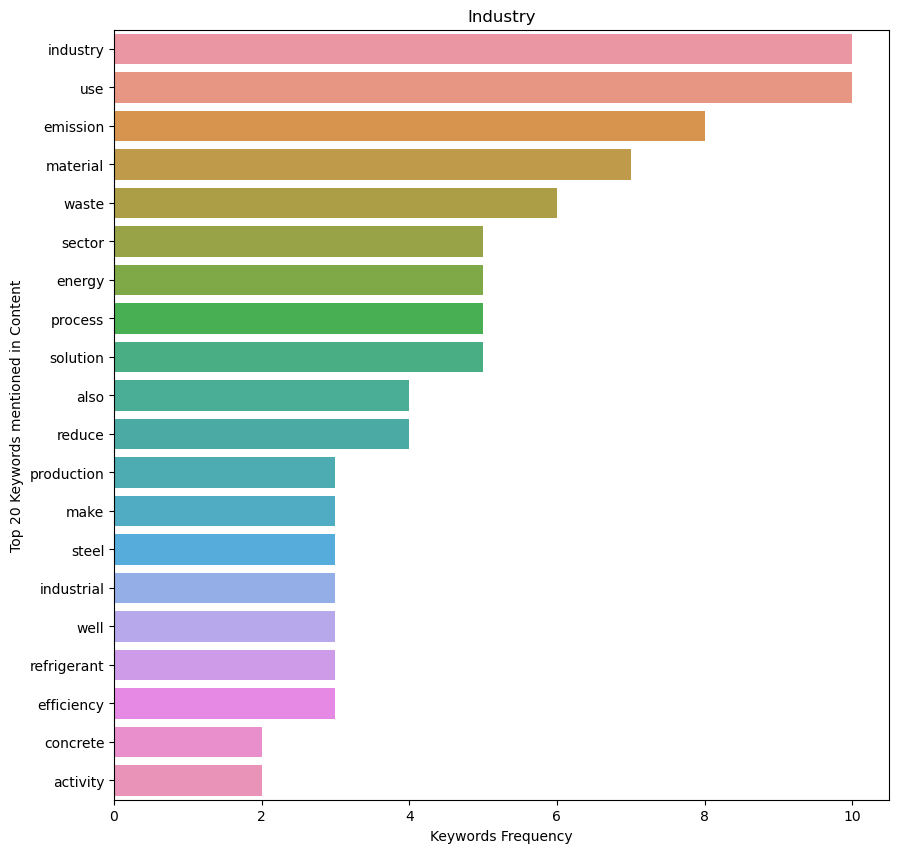

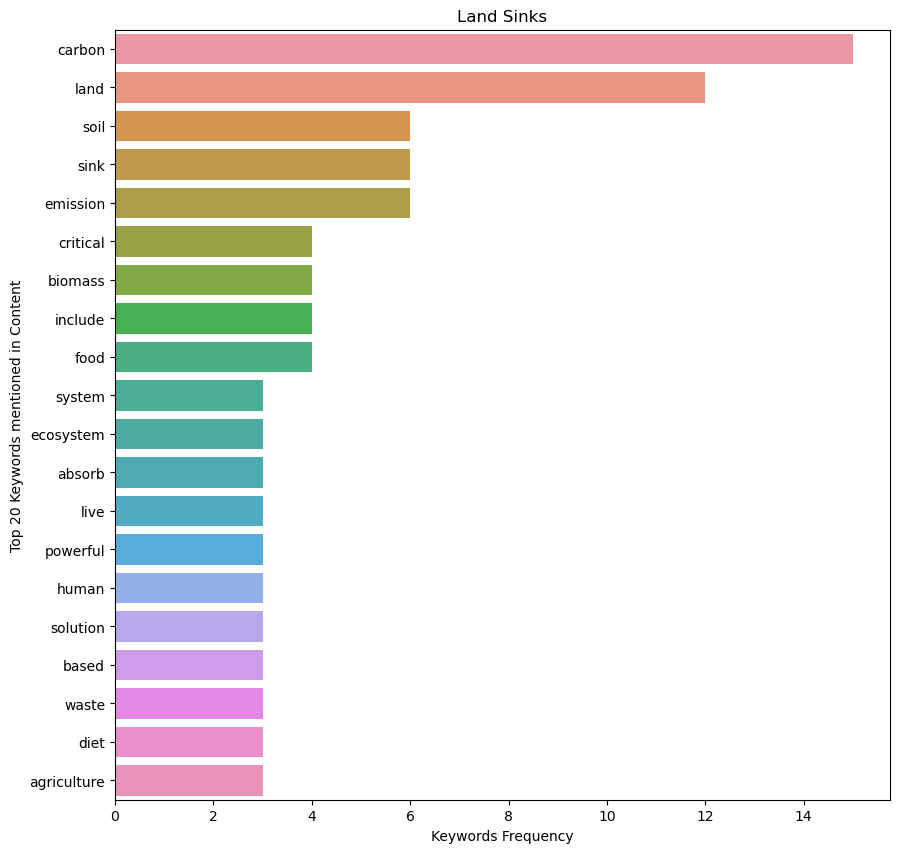

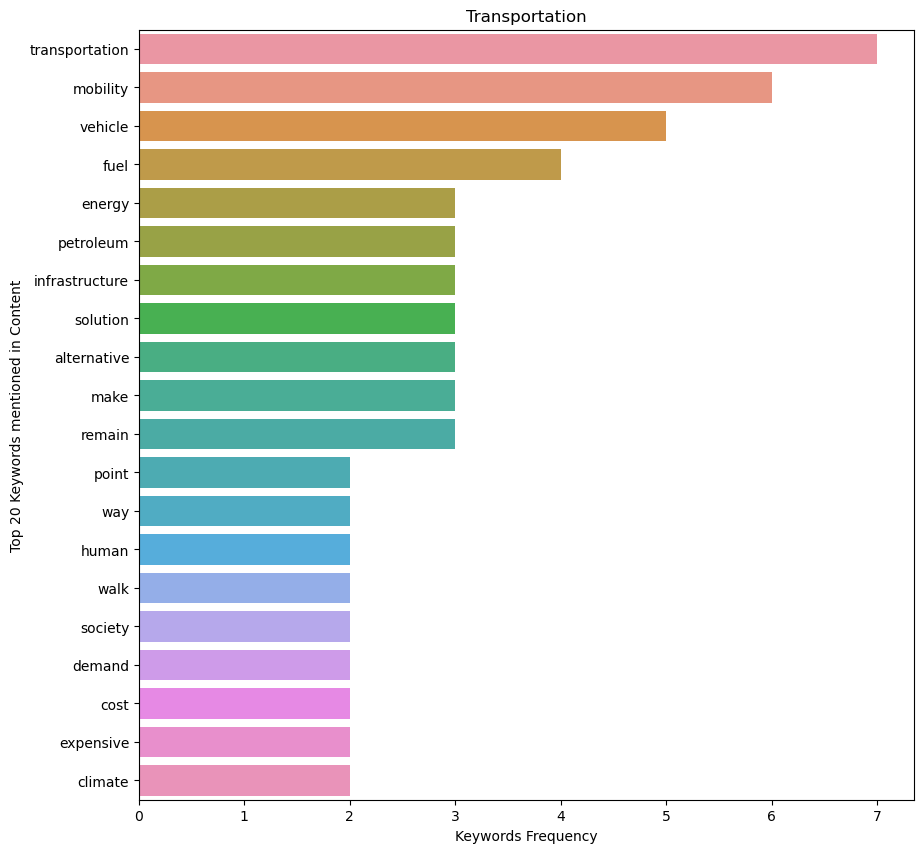

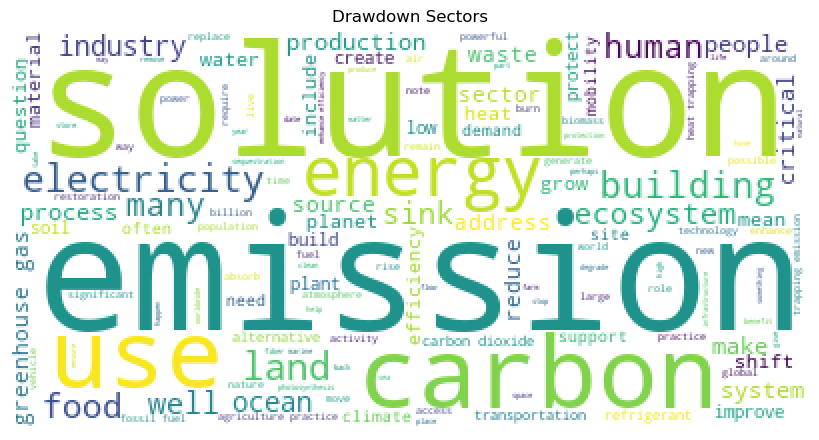

In [23]:
def wordcloud(sentence, title):

    stopword = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white", max_words=2000, stopwords=stopword, 
                          contour_width=1).generate(' '.join(sentence))   

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title)
    plt.show()
    
wordcloud(df_dd_sectors['preprocessed_text'], 'Drawdown Sectors')

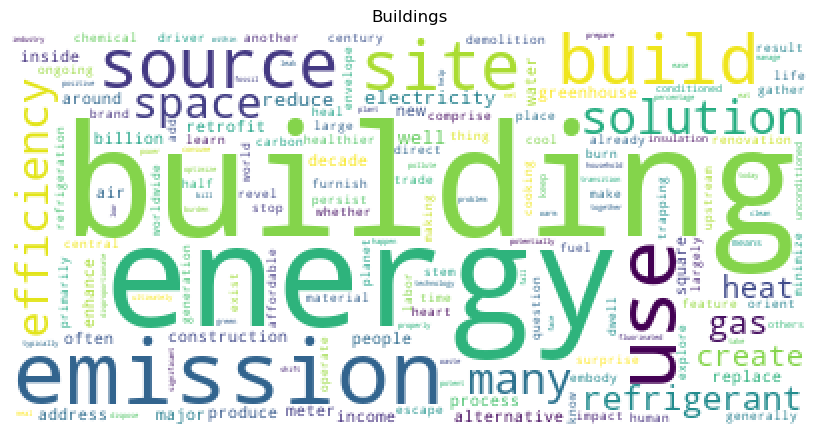

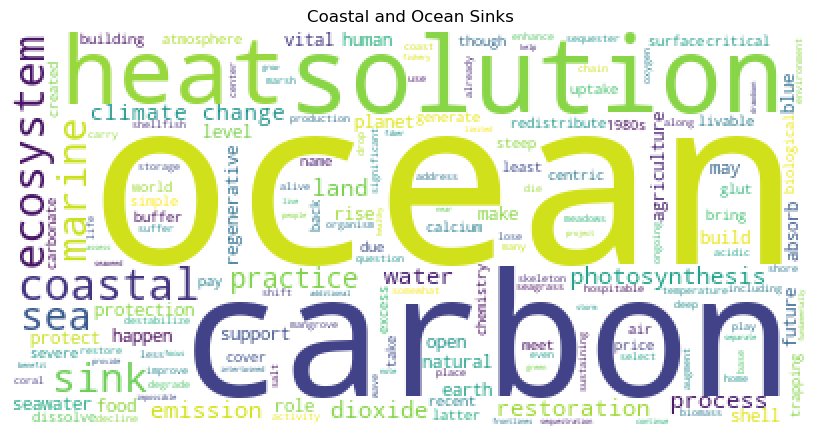

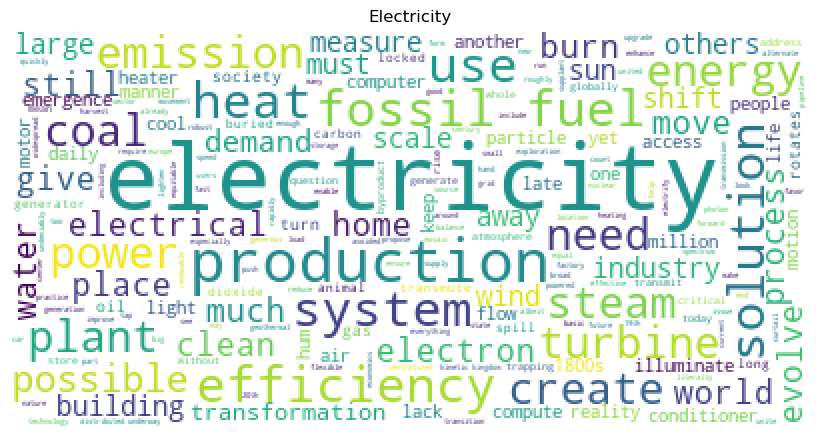

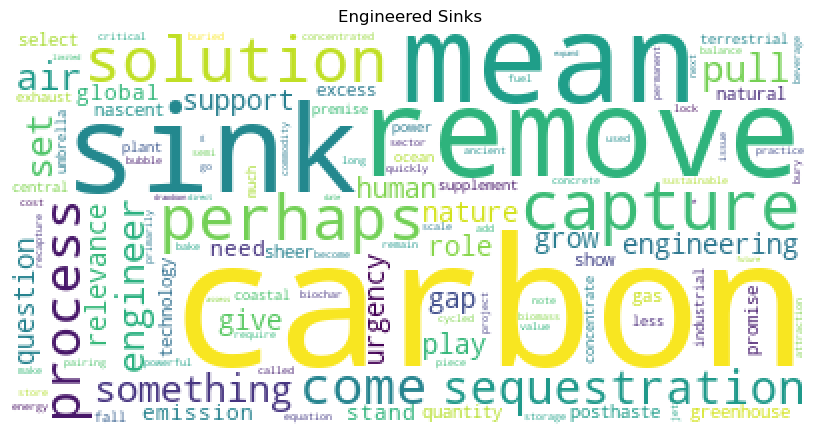

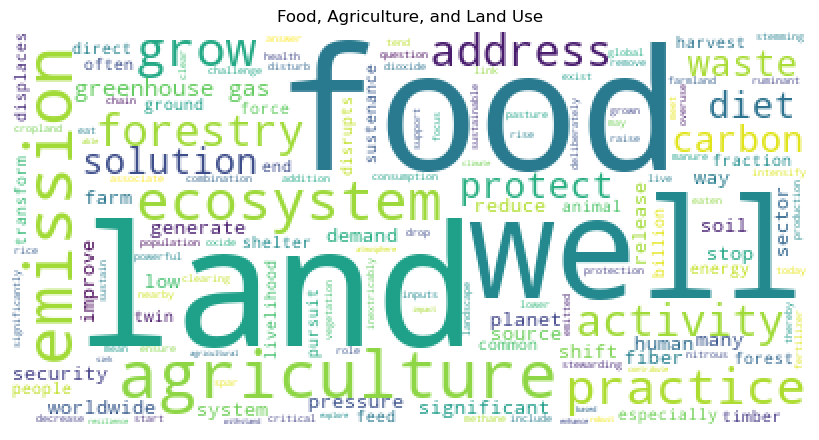

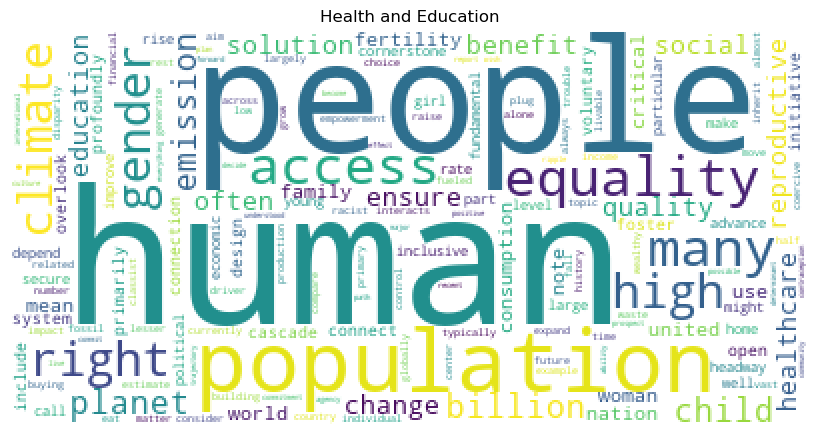

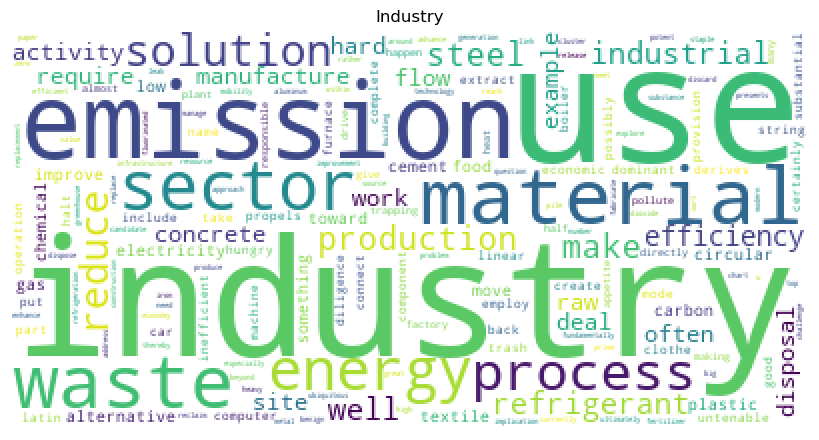

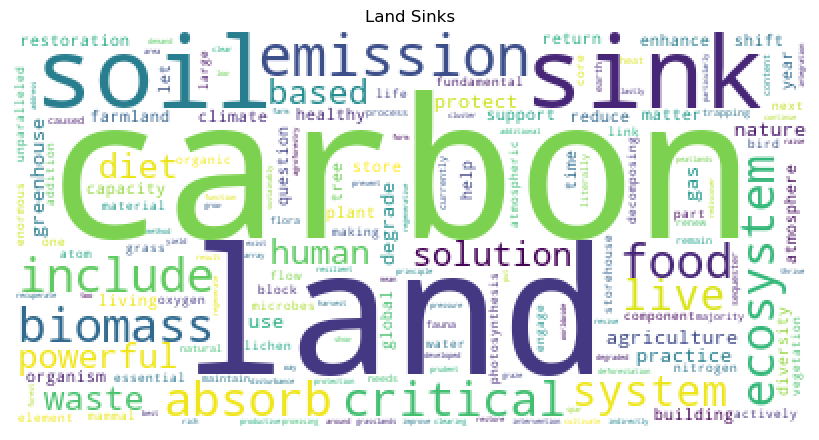

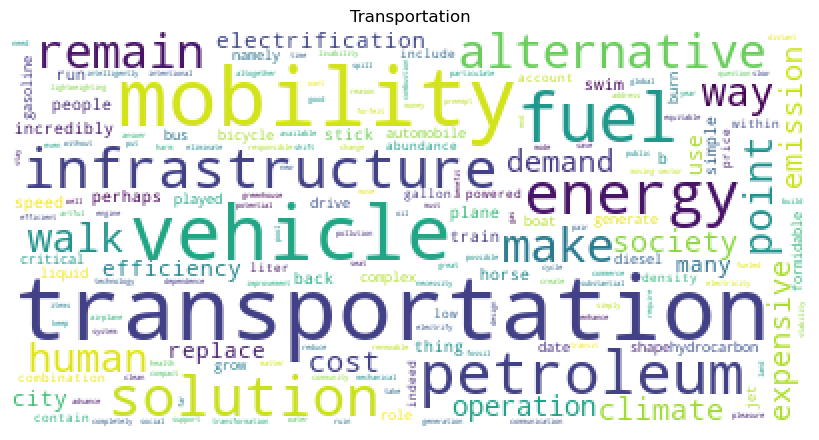

In [24]:
wordcloud(df_dd_sectors[df_dd_sectors['sector']=='Buildings']['preprocessed_text'], 'Buildings')
wordcloud(df_dd_sectors[df_dd_sectors['sector']=='Coastal and Ocean Sinks']['preprocessed_text'], 'Coastal and Ocean Sinks')
wordcloud(df_dd_sectors[df_dd_sectors['sector']=='Electricity']['preprocessed_text'], 'Electricity')
wordcloud(df_dd_sectors[df_dd_sectors['sector']=='Engineered Sinks']['preprocessed_text'], 'Engineered Sinks')
wordcloud(df_dd_sectors[df_dd_sectors['sector']== 'Food, Agriculture, and\xa0Land Use']['preprocessed_text'], 'Food, Agriculture, and\xa0Land Use')
wordcloud(df_dd_sectors[df_dd_sectors['sector']=='Health and Education']['preprocessed_text'], 'Health and Education')
wordcloud(df_dd_sectors[df_dd_sectors['sector']=='Industry']['preprocessed_text'], 'Industry')
wordcloud(df_dd_sectors[df_dd_sectors['sector']=='Land Sinks']['preprocessed_text'], 'Land Sinks')
wordcloud(df_dd_sectors[df_dd_sectors['sector']=='Transportation']['preprocessed_text'], 'Transportation')



In [25]:
#Bi-grams 

def plot_top_bigrams_barchart(text, title, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.xlabel("Bi-gram Frequency")
    plt.ylabel("Top 20 bi-grams mentioned in Service Description")
    sns.barplot(x=y,y=x)
    

Checking most common bi-grams for the whole dataset, i.e., most common combinations of 2 words:

In [26]:
plot_top_bigrams_barchart(df_dd_sectors['preprocessed_text'], 'Drowdown Sectors', 2)


In [27]:
plot_top_bigrams_barchart(df_dd_sectors[df_dd_sectors['sector']=='Buildings']['preprocessed_text'], 'Buildings', 1)
plot_top_bigrams_barchart(df_dd_sectors[df_dd_sectors['sector']=='Coastal and Ocean Sinks']['preprocessed_text'], 'Coastal and Ocean Sinks', 1)
plot_top_bigrams_barchart(df_dd_sectors[df_dd_sectors['sector']=='Electricity']['preprocessed_text'], 'Electricity', 1)
plot_top_bigrams_barchart(df_dd_sectors[df_dd_sectors['sector']=='Engineered Sinks']['preprocessed_text'], 'Engineered Sinks', 1)
plot_top_bigrams_barchart(df_dd_sectors[df_dd_sectors['sector']== 'Food, Agriculture, and\xa0Land Use']['preprocessed_text'], 'Food, Agriculture, and\xa0Land Use',1)
plot_top_bigrams_barchart(df_dd_sectors[df_dd_sectors['sector']=='Health and Education']['preprocessed_text'], 'Health and Education',1)
plot_top_bigrams_barchart(df_dd_sectors[df_dd_sectors['sector']=='Industry']['preprocessed_text'], 'Industry',1)
plot_top_bigrams_barchart(df_dd_sectors[df_dd_sectors['sector']=='Land Sinks']['preprocessed_text'], 'Land Sinks',1)
plot_top_bigrams_barchart(df_dd_sectors[df_dd_sectors['sector']=='Transportation']['preprocessed_text'], 'Transportation',1)


In [28]:
#tri-grams

def plot_top_trigrams_barchart(text, title, n=3):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.xlabel("Tri-gram Frequency")
    plt.ylabel("Top 20 tri-grams mentioned in Service Description")
    sns.barplot(x=y,y=x)




In [29]:
plot_top_trigrams_barchart(df_dd_sectors['preprocessed_text'], 'Drawdown Sectors',3)

Now looking at top tri-grams per category:

In [30]:
plot_top_trigrams_barchart(df_dd_sectors[df_dd_sectors['sector']=='Buildings']['preprocessed_text'], 'Buildings', 1)
plot_top_trigrams_barchart(df_dd_sectors[df_dd_sectors['sector']=='Coastal and Ocean Sinks']['preprocessed_text'], 'Coastal and Ocean Sinks', 1)
plot_top_trigrams_barchart(df_dd_sectors[df_dd_sectors['sector']=='Electricity']['preprocessed_text'], 'Electricity', 1)
plot_top_trigrams_barchart(df_dd_sectors[df_dd_sectors['sector']=='Engineered Sinks']['preprocessed_text'], 'Engineered Sinks', 1)
plot_top_trigrams_barchart(df_dd_sectors[df_dd_sectors['sector']== 'Food, Agriculture, and\xa0Land Use']['preprocessed_text'], 'Food, Agriculture, and\xa0Land Use',1)
plot_top_trigrams_barchart(df_dd_sectors[df_dd_sectors['sector']=='Health and Education']['preprocessed_text'], 'Health and Education',1)
plot_top_trigrams_barchart(df_dd_sectors[df_dd_sectors['sector']=='Industry']['preprocessed_text'], 'Industry',1)
plot_top_trigrams_barchart(df_dd_sectors[df_dd_sectors['sector']=='Land Sinks']['preprocessed_text'], 'Land Sinks',1)
plot_top_trigrams_barchart(df_dd_sectors[df_dd_sectors['sector']=='Transportation']['preprocessed_text'], 'Transportation',1)


## Further improvements ##

* add analysis to other datasets  
* extract relevant keywords for each sector and store in a csv file
* create a classifier